In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.learning_curve import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

C:\Users\RAHAF_PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\RAHAF_PC\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# Load Data

In [2]:
edm = pd.read_csv('xAPI-Edu-Data.csv')
edm.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
edm['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

# One Hat Encoding

In [4]:
data_T = edm.copy()
data_T['Class'] = [1 if x == 'L' else 2 if x == 'M'  else 3 for x in data_T['Class']]
y = data_T['Class']
Features = data_T.loc[:, 'gender':'StudentAbsenceDays']



In [5]:
print("Original features:\n", list(Features.columns), "\n")
data_dummies = pd.get_dummies(Features)
print("Features after get_dummies:\n", list(data_dummies.columns))



Original features:
 ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays'] 

Features after get_dummies:
 ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'gender_F', 'gender_M', 'NationalITy_Egypt', 'NationalITy_Iran', 'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine', 'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis', 'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela', 'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA', 'PlaceofBirth_lebano

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_dummies, y,  random_state=42)


In [7]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

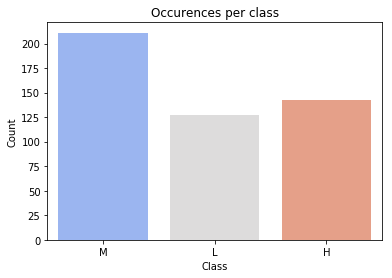

In [8]:
# Counts per class --> Is the dataset unbalanced?
counts = sns.countplot(x='Class', data=edm, palette='coolwarm')
counts.set(xlabel='Class', ylabel='Count', title='Occurences per class')
plt.show()

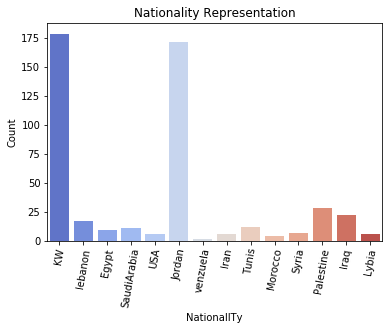

In [9]:
# Exploring nationalities
nat = sns.countplot(x='NationalITy', data=edm, palette='coolwarm')
nat.set(xlabel='NationalITy', ylabel='Count', title='Nationality Representation')
plt.setp(nat.get_xticklabels(), rotation=80)
plt.show()

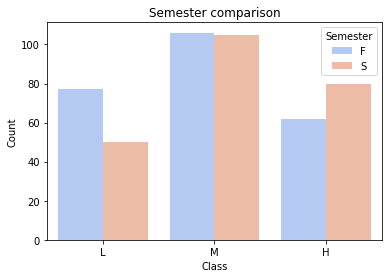

In [10]:
# Semester comparison
sem = sns.countplot(x='Class', hue='Semester', order=['L', 'M', 'H'], data=edm, palette='coolwarm')
sem.set(xlabel='Class', ylabel='Count', title='Semester comparison')
plt.show()

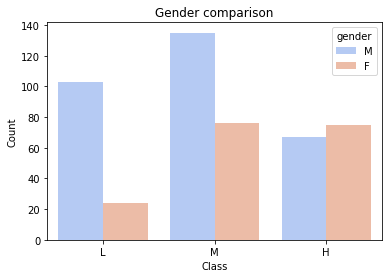

In [11]:
# gender comparison
plot = sns.countplot(x='Class', hue='gender', data=edm, order=['L', 'M', 'H'], palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

# Logistic regression on orginal data

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sepal_std = sc.fit_transform(X_train)
X_test_sepal_std = sc.transform(X_test)

sc = StandardScaler()
X_train_petal_std = sc.fit_transform(X_train)
X_test_petal_std = sc.transform(X_test)


In [13]:
C_param_range = [0.001,0.01,0.1,1,2,3,10,100]
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(solver ='newton-cg',multi_class ='multinomial', C = i,random_state = 0)
    lr.fit(X_train,y_train)
    
    # Predict using model
    y_pred_sepal = lr.predict(X_test)
    j += 1
    print("c:",i,"Test score for LogisticRegression on orginal data: {:.2f}".format(lr.score(X_test, y_test))) 

c: 0.001 Test score for LogisticRegression on orginal data: 0.64
c: 0.01 Test score for LogisticRegression on orginal data: 0.72
c: 0.1 Test score for LogisticRegression on orginal data: 0.80
c: 1 Test score for LogisticRegression on orginal data: 0.81
c: 2 Test score for LogisticRegression on orginal data: 0.82
c: 3 Test score for LogisticRegression on orginal data: 0.80
c: 10 Test score for LogisticRegression on orginal data: 0.78
c: 100 Test score for LogisticRegression on orginal data: 0.78


<Figure size 720x720 with 0 Axes>

# Validation Curve

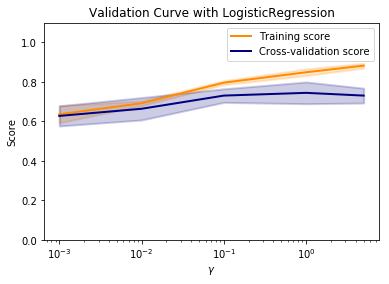

In [16]:
from sklearn.learning_curve import validation_curve
# PETAL Plot validation curve
param_range = [0.001,0.01,0.1,1,5]



# PETAL Plot validation curve
lr = LogisticRegression(solver ='newton-cg',multi_class ='multinomial',random_state = 0)
train_petal_scores, test_petal_scores = validation_curve(estimator=lr,X=X_train,y=y_train,param_name='C',param_range=C_param_range,scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_petal_scores, axis=1)
train_scores_std = np.std(train_petal_scores, axis=1)
test_scores_mean = np.mean(test_petal_scores  , axis=1)
test_scores_std = np.std(test_petal_scores  , axis=1)

plt.title("Validation Curve with LogisticRegression")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

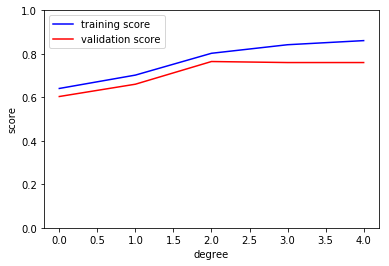

In [17]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 5)
C_param_range = [0.001,0.01,0.1,1,5]
train_score, val_score = validation_curve( LogisticRegression(solver ='newton-cg',multi_class ='multinomial',random_state = 0), X_train, y_train,
                                          'C', C_param_range , cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [18]:
log_reg = LogisticRegression(solver ='newton-cg',multi_class ='multinomial',C = 2,random_state = 0)
log_reg.fit(X_train, y_train)
print("Test score for LogisticRegression on orginal data: {:.2f}".format(log_reg.score(X_test, y_test)))


Test score for LogisticRegression on orginal data: 0.82


In [19]:

lr_predicted = log_reg.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier \n')
print_cm(confusion, ['L', 'M' ,'H'])
print('\n')
print('Logistic regression classification report \n')
print(classification_report(y_test, lr_predicted, target_names=['L', 'M' ,'H']))

Logistic regression classifier 

              L     M     H 
        L  30.0   4.0   0.0 
        M   4.0  49.0   5.0 
        H   0.0   8.0  20.0 


Logistic regression classification report 

             precision    recall  f1-score   support

          L       0.88      0.88      0.88        34
          M       0.80      0.84      0.82        58
          H       0.80      0.71      0.75        28

avg / total       0.82      0.82      0.82       120



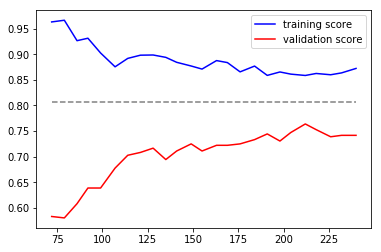

In [20]:

N, train_lc, val_lc = learning_curve(LogisticRegression(solver ='newton-cg',multi_class ='multinomial',C = 2,random_state = 0),
                                      X_train, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

# ROC curves, Area-Under-Curve (AUC)

In [23]:
#from sklearn.metrics import roc_curve, auc

#y_score_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
#fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
#roc_auc_lr = auc(fpr_lr, tpr_lr)

#plt.figure()
#plt.xlim([-0.01, 1.00])
#plt.ylim([-0.01, 1.01])
#plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
#plt.xlabel('False Positive Rate', fontsize=16)
#plt.ylabel('True Positive Rate', fontsize=16)
#plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
#plt.legend(loc='lower right', fontsize=13)
#plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
#plt.axes().set_aspect('equal')
#plt.show()

# Cross-validation¶

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# accuracy is the default scoring metric
scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Cross-validation (accuracy)', scores)




Cross-validation (accuracy) [0.7260274  0.7260274  0.82191781 0.73239437 0.74285714]


In [25]:
print("Average cross-validation score (accuracy) : {:.2f}".format(scores.mean()))

Average cross-validation score (accuracy) : 0.75


# Desicion Tree on orginal Data

In [35]:

for i in range(1,10):
    for j in range(1,5):
        dt = DecisionTreeClassifier(max_depth=i,min_samples_leaf=j  ).fit(X_train, y_train)
        print('max depth=', i,'min leaf=', j, "Test score for DecisionTree on orginal data: {:.2f}".format(dt.score(X_test, y_test)))

dt = DecisionTreeClassifier(min_samples_leaf=1 , max_depth=7).fit(X_train, y_train)        
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
print('decision tree classifier \n')
print_cm(confusion, ['L', 'M' ,'H'])
print('\n')
print('DecisionTree classification report \n')
print(classification_report(y_test, tree_predicted, target_names=['L', 'M' ,'H']))

max depth= 1 min leaf= 1 Test score for DecisionTree on orginal data: 0.50
max depth= 1 min leaf= 2 Test score for DecisionTree on orginal data: 0.50
max depth= 1 min leaf= 3 Test score for DecisionTree on orginal data: 0.50
max depth= 1 min leaf= 4 Test score for DecisionTree on orginal data: 0.50
max depth= 2 min leaf= 1 Test score for DecisionTree on orginal data: 0.70
max depth= 2 min leaf= 2 Test score for DecisionTree on orginal data: 0.70
max depth= 2 min leaf= 3 Test score for DecisionTree on orginal data: 0.70
max depth= 2 min leaf= 4 Test score for DecisionTree on orginal data: 0.70
max depth= 3 min leaf= 1 Test score for DecisionTree on orginal data: 0.76
max depth= 3 min leaf= 2 Test score for DecisionTree on orginal data: 0.76
max depth= 3 min leaf= 3 Test score for DecisionTree on orginal data: 0.76
max depth= 3 min leaf= 4 Test score for DecisionTree on orginal data: 0.76
max depth= 4 min leaf= 1 Test score for DecisionTree on orginal data: 0.79
max depth= 4 min leaf= 2 

In [26]:
print(data_dummies.columns)

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender_F', 'gender_M', 'NationalITy_Egypt', 'NationalITy_Iran',
       'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW',
       'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq',
       'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia',
       'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine',
       'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis',
       'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela',
       'StageID_HighSchool', 'StageID_MiddleSchool', 'StageID_lowerlevel',
       'GradeID_G-02', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 

[0.05675122 0.20551572 0.11187785 0.05668422 0.00425804 0.03289503
 0.         0.         0.         0.00993542 0.         0.
 0.         0.         0.00723952 0.         0.01587846 0.
 0.         0.         0.         0.         0.         0.02065438
 0.         0.         0.         0.         0.00678256 0.
 0.         0.00425804 0.         0.         0.         0.
 0.01239992 0.01544473 0.         0.         0.01277411 0.
 0.00887091 0.         0.         0.00709673 0.00171999 0.
 0.01267273 0.00638706 0.00425804 0.         0.01193731 0.00506909
 0.01535797 0.         0.01938015 0.         0.01320707 0.00417288
 0.00284173 0.         0.         0.00993542 0.03120937 0.
 0.04549369 0.00851607 0.01155753 0.00454191 0.         0.20242514]


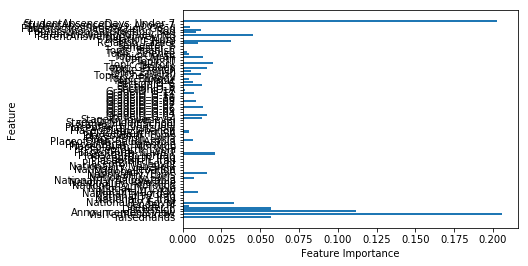

In [27]:
clf_all = DecisionTreeClassifier(random_state=42)
clf_all.fit(X_train, y_train)
print(clf_all.feature_importances_)

import numpy as np
n_features = data_dummies.shape[1]
plt.barh(range(n_features), clf_all.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data_dummies.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

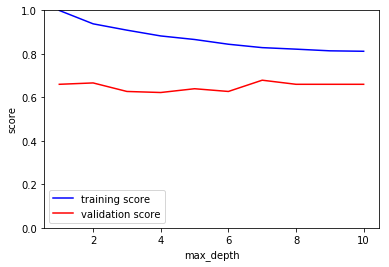

In [33]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 5)
C_param_range = [1,2,3,4,5,6,7,8,9,10]
train_score, val_score = validation_curve( DecisionTreeClassifier(random_state=42), X_train, y_train,
                                          'min_samples_leaf', C_param_range , cv=7)

plt.plot(C_param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(C_param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('max_depth')
plt.ylabel('score');

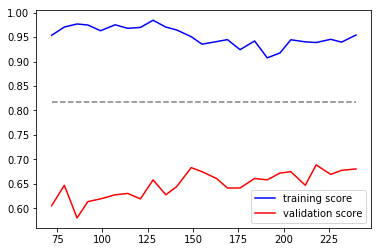

In [29]:
 N, train_lc, val_lc = learning_curve(DecisionTreeClassifier(max_depth=7,min_samples_leaf=1,random_state=42),
                                       X_train, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

In [30]:

dt = DecisionTreeClassifier(max_depth=7,min_samples_leaf=1,random_state=42)




# Cross-validation

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# accuracy is the default scoring metric
scores = cross_val_score(dt, X_train, y_train, cv=5)
print('Cross-validation (accuracy)', scores)



Cross-validation (accuracy) [0.5890411  0.65753425 0.78082192 0.67605634 0.6       ]


In [43]:
print("Average cross-validation score (accuracy) : {:.2f}".format(scores.mean()))

Average cross-validation score (accuracy) : 0.66


# SVM on orginal data

In [44]:
for i in [1,5,10,50]:
    svm = SVC(kernel='linear', C=i).fit(X_train, y_train)
    print('i :',i, "Test score for SVM on orginal data: {:.2f}".format(svm.score(X_test, y_test)))
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n')
print_cm(confusion, ['L', 'M' ,'H'])


print('\n')
print('SVM classification report \n')
print(classification_report(y_test, svm_predicted, target_names=['L', 'M' ,'H']))



i : 1 Test score for SVM on orginal data: 0.80
i : 5 Test score for SVM on orginal data: 0.81
i : 10 Test score for SVM on orginal data: 0.82
i : 50 Test score for SVM on orginal data: 0.78
Support vector machine classifier (linear kernel, C=1)

              L     M     H 
        L  27.0   7.0   0.0 
        M   4.0  47.0   7.0 
        H   0.0   9.0  19.0 


SVM classification report 

             precision    recall  f1-score   support

          L       0.87      0.79      0.83        34
          M       0.75      0.81      0.78        58
          H       0.73      0.68      0.70        28

avg / total       0.78      0.78      0.78       120



Test score for SVM on orginal data: 0.82
Support vector machine classifier (linear kernel, C=10)

              L     M     H 
        L  29.0   5.0   0.0 
        M   3.0  47.0   8.0 
        H   0.0   5.0  23.0 


SVM classification report 

             precision    recall  f1-score   support

          L       0.91      0.85      0.88        34
          M       0.82      0.81      0.82        58
          H       0.74      0.82      0.78        28

avg / total       0.83      0.82      0.83       120



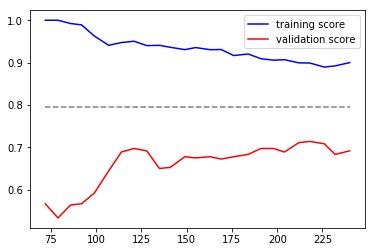

In [45]:
## best score

svm = SVC(kernel='linear', C=10).fit(X_train, y_train)
print( "Test score for SVM on orginal data: {:.2f}".format(svm.score(X_test, y_test)))
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=10)\n')
print_cm(confusion, ['L', 'M' ,'H'])


print('\n')
print('SVM classification report \n')
print(classification_report(y_test, svm_predicted, target_names=['L', 'M' ,'H']))

N, train_lc, val_lc = learning_curve(SVC(kernel='linear', C=10),
                                       X_train, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

# Cross-validation

In [46]:
from sklearn.model_selection import cross_val_score


# accuracy is the default scoring metric
scores = cross_val_score(svm, X_train, y_train, cv=5)
print('Cross-validation (accuracy)', scores)



Cross-validation (accuracy) [0.63013699 0.64383562 0.78082192 0.70422535 0.72857143]


In [47]:
print("Average cross-validation score (recall) : {:.2f}".format(scores.mean()))

Average cross-validation score (recall) : 0.70


# SVM Poly Kernal on orginal Data

In [55]:

degree1, degree2,degree3,degree4 =1,2,5,10
C1, C2,C3,C4 = 1, 5,10,50
hyperparams = (degree1, C1), (degree2, C1), (degree3, C1), (degree4, C1),(degree1, C2), (degree2, C2), (degree3, C2), (degree4, C2),(degree1, C3), (degree2, C3), (degree3, C3), (degree4, C3), (degree1, C4), (degree2, C4), (degree3, C4), (degree4, C4)

svm_clfs = []
for degree, C in hyperparams:
        poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=degree, coef0=1, C=C))
        ])
    

        poly_kernel_svm_clf.fit(X_train, y_train)
        print('degree :',degree,'C:',C, "Test score for SVM on orginal data: {:.2f}".format(poly_kernel_svm_clf.score(X_test, y_test)))
        
        


degree : 1 C: 1 Test score for SVM on orginal data: 0.75
degree : 2 C: 1 Test score for SVM on orginal data: 0.78
degree : 5 C: 1 Test score for SVM on orginal data: 0.85
degree : 10 C: 1 Test score for SVM on orginal data: 0.84
degree : 1 C: 5 Test score for SVM on orginal data: 0.81
degree : 2 C: 5 Test score for SVM on orginal data: 0.82
degree : 5 C: 5 Test score for SVM on orginal data: 0.87
degree : 10 C: 5 Test score for SVM on orginal data: 0.84
degree : 1 C: 10 Test score for SVM on orginal data: 0.82
degree : 2 C: 10 Test score for SVM on orginal data: 0.84
degree : 5 C: 10 Test score for SVM on orginal data: 0.88
degree : 10 C: 10 Test score for SVM on orginal data: 0.84
degree : 1 C: 50 Test score for SVM on orginal data: 0.80
degree : 2 C: 50 Test score for SVM on orginal data: 0.82
degree : 5 C: 50 Test score for SVM on orginal data: 0.88
degree : 10 C: 50 Test score for SVM on orginal data: 0.84


Test score for SVM on orginal data: 0.88
1.0
Support vector machine classifier (poly kernel, C=10)

              L     M     H 
        L  31.0   3.0   0.0 
        M   2.0  50.0   6.0 
        H   0.0   4.0  24.0 


SVM classification report 

             precision    recall  f1-score   support

          L       0.94      0.91      0.93        34
          M       0.88      0.86      0.87        58
          H       0.80      0.86      0.83        28

avg / total       0.88      0.88      0.88       120



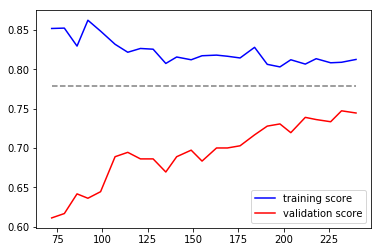

In [58]:
#best scor

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=5, coef0=1, C=10))
        ])
    
poly_kernel_svm_clf.fit(X_train,y_train)
print( "Test score for SVM on orginal data: {:.2f}".format(poly_kernel_svm_clf.score(X_test, y_test)))
print(poly_kernel_svm_clf.score(X_train, y_train))
svm_predicted = poly_kernel_svm_clf.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (poly kernel, C=10)\n')
print_cm(confusion, ['L', 'M' ,'H'])


print('\n')
print('SVM classification report \n')
print(classification_report(y_test, svm_predicted, target_names=['L', 'M' ,'H']))

N, train_lc, val_lc = learning_curve(SVC(kernel="poly", degree=1, coef0=1, C=10),
                                       X_train, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')
        

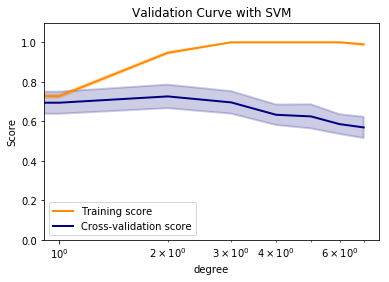

In [59]:

from sklearn.model_selection import validation_curve



param_range = np.arange(0, 8)
train_scores, test_scores = validation_curve(
    SVC(kernel="poly"), X_train, y_train, param_name="degree", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("degree")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

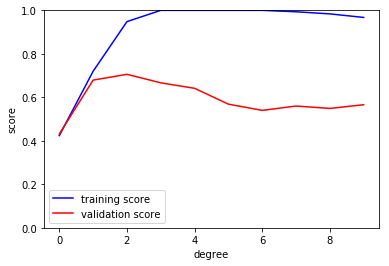

In [60]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,10)

train_score, val_score = validation_curve(SVC(kernel="poly"), X_train, y_train,
                                          'degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

# SVM Gaussian Kernal on orginal Data

In [26]:
gamma1, gamma2,gamma3,gamma4 = 0.1,5,10,2
C1, C2,C3,C4 = 0.0001, 5,10,50
hyperparams = (gamma1, C1), (gamma2, C1), (gamma3, C1), (gamma4, C1),(gamma1, C2), (gamma2, C2), (gamma3, C2), (gamma4, C2),(gamma1, C3), (gamma2, C3), (gamma3, C3), (gamma4, C3), (gamma1, C4), (gamma2, C4), (gamma3, C4), (gamma4, C4)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X_train, y_train)
    print('gamma :',gamma,'C:',C, "Test score for SVM on orginal data: {:.2f}".format(rbf_kernel_svm_clf.score(X_test, y_test)))




gamma : 0.1 C: 0.0001 Test score for SVM on orginal data: 0.48
gamma : 5 C: 0.0001 Test score for SVM on orginal data: 0.48
gamma : 10 C: 0.0001 Test score for SVM on orginal data: 0.48
gamma : 2 C: 0.0001 Test score for SVM on orginal data: 0.48
gamma : 0.1 C: 5 Test score for SVM on orginal data: 0.67
gamma : 5 C: 5 Test score for SVM on orginal data: 0.52
gamma : 10 C: 5 Test score for SVM on orginal data: 0.51
gamma : 2 C: 5 Test score for SVM on orginal data: 0.51
gamma : 0.1 C: 10 Test score for SVM on orginal data: 0.67
gamma : 5 C: 10 Test score for SVM on orginal data: 0.52
gamma : 10 C: 10 Test score for SVM on orginal data: 0.51
gamma : 2 C: 10 Test score for SVM on orginal data: 0.51
gamma : 0.1 C: 50 Test score for SVM on orginal data: 0.67
gamma : 5 C: 50 Test score for SVM on orginal data: 0.52
gamma : 10 C: 50 Test score for SVM on orginal data: 0.51
gamma : 2 C: 50 Test score for SVM on orginal data: 0.51


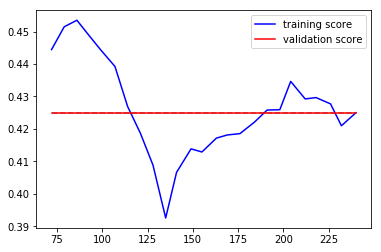

In [28]:
N, train_lc, val_lc = learning_curve(SVC(kernel="rbf", gamma=0.1, C=0.0001),
                                       X_train, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

# Nearest Neighbors Classification¶


In [61]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap
n_neighbors = [2,3,4,5,7,8,9,10]

h = .02  # step size in the mesh


for weights in ['uniform', 'distance']:
    for i in n_neighbors:
    # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(i, weights=weights)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print('i:',i,weights,"Test score for KNN on orginal data: {:.2f}".format(clf.score(X_test, y_test)))
   
    

i: 2 uniform Test score for KNN on orginal data: 0.65
i: 3 uniform Test score for KNN on orginal data: 0.67
i: 4 uniform Test score for KNN on orginal data: 0.65
i: 5 uniform Test score for KNN on orginal data: 0.69
i: 7 uniform Test score for KNN on orginal data: 0.65
i: 8 uniform Test score for KNN on orginal data: 0.65
i: 9 uniform Test score for KNN on orginal data: 0.66
i: 10 uniform Test score for KNN on orginal data: 0.64
i: 2 distance Test score for KNN on orginal data: 0.59
i: 3 distance Test score for KNN on orginal data: 0.67
i: 4 distance Test score for KNN on orginal data: 0.67
i: 5 distance Test score for KNN on orginal data: 0.67
i: 7 distance Test score for KNN on orginal data: 0.66
i: 8 distance Test score for KNN on orginal data: 0.66
i: 9 distance Test score for KNN on orginal data: 0.67
i: 10 distance Test score for KNN on orginal data: 0.63


In [65]:
for weights in ['uniform', 'distance']:
        clf = neighbors.KNeighborsClassifier(5, weights=weights)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print('i:',i,weights,"Test score for KNN on orginal data: {:.2f}".format(clf.score(X_test, y_test)))
   


confusion = confusion_matrix(y_test, y_pred)

print('KNN classifier \n')
print_cm(confusion, ['L', 'M' ,'H'])
print('\n')
print('KNN classification report \n')
print(classification_report(y_test, y_pred, target_names=['L', 'M' ,'H']))



i: 10 uniform Test score for KNN on orginal data: 0.69
i: 10 distance Test score for KNN on orginal data: 0.67
KNN classifier 

              L     M     H 
        L  28.0   5.0   1.0 
        M   9.0  35.0  14.0 
        H   1.0  10.0  17.0 


KNN classification report 

             precision    recall  f1-score   support

          L       0.74      0.82      0.78        34
          M       0.70      0.60      0.65        58
          H       0.53      0.61      0.57        28

avg / total       0.67      0.67      0.67       120



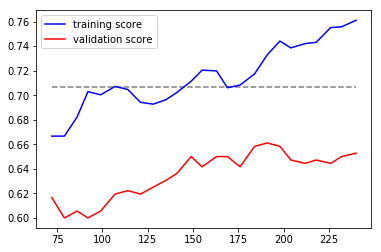

In [50]:
N, train_lc, val_lc = learning_curve(neighbors.KNeighborsClassifier(n_neighbors, weights='uniform'),
                                       X_train, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')
        

# Voting classifiers

In [7]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB()
dtclf = DecisionTreeClassifier(random_state = 42)

lgclf = LogisticRegression(solver ='newton-cg',multi_class ='multinomial', C = 2,random_state = 42)



In [8]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', lgclf), ('dt', dtclf), ('nb', nbclf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', Dec...0.0, presort=False, random_state=42,
            splitter='best')), ('nb', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [9]:
from sklearn.metrics import accuracy_score

for clf in (lgclf, dtclf, nbclf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print('Accuracy of {} classifier on training set: {:.2f}'
     .format(clf.__class__.__name__,clf.score(X_train, y_train)))
    print('Accuracy of {} classifier on test set: {:.2f}'
     .format(clf.__class__.__name__,clf.score(X_test, y_test)))
    print()

Accuracy of LogisticRegression classifier on training set: 0.84
Accuracy of LogisticRegression classifier on test set: 0.82

Accuracy of DecisionTreeClassifier classifier on training set: 1.00
Accuracy of DecisionTreeClassifier classifier on test set: 0.82

Accuracy of GaussianNB classifier on training set: 0.47
Accuracy of GaussianNB classifier on test set: 0.43

Accuracy of VotingClassifier classifier on training set: 0.89
Accuracy of VotingClassifier classifier on test set: 0.80



c:\users\pcr\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\pcr\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\pcr\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


c:\users\pcr\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\pcr\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\pcr\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\pcr\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocess

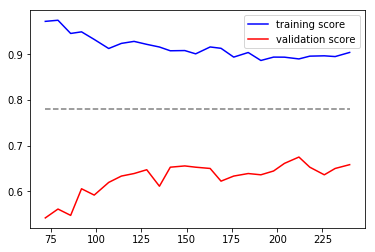

In [10]:
N, train_lc, val_lc = learning_curve(VotingClassifier(estimators=[('lr', lgclf), ('dt', dtclf), ('nb', nbclf)],voting='hard'),
                                       X_train, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

# Random Forests

In [13]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42,max_leaf_nodes=16),
    n_estimators=500,max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=16, n_jobs=-1, random_state=52)
rnd_clf.fit(X_train, y_train)
print("Test score for Random Forests on orginal data: {:.2f}".format(rnd_clf.score(X_test, y_test)))
y_pred_rf = rnd_clf.predict(X_test)

Test score for Random Forests on orginal data: 0.83


In [14]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.9

In [15]:

confusion = confusion_matrix(y_test, y_pred_rf)

print('Random Forests classifier \n')
print_cm(confusion, ['L', 'M' ,'H'])
print('\n')
print('Random Forests classification report \n')
print(classification_report(y_test, y_pred_rf, target_names=['L', 'M' ,'H']))


Random Forests classifier 

              L     M     H 
        L  31.0   3.0   0.0 
        M   3.0  51.0   4.0 
        H   0.0  10.0  18.0 


Random Forests classification report 

             precision    recall  f1-score   support

          L       0.91      0.91      0.91        34
          M       0.80      0.88      0.84        58
          H       0.82      0.64      0.72        28

avg / total       0.83      0.83      0.83       120



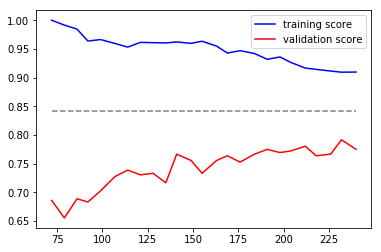

In [16]:
N, train_lc, val_lc = learning_curve(RandomForestClassifier(n_estimators=300, max_leaf_nodes=16, n_jobs=-1, random_state=42),
                                       X_train, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

In [17]:
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=52,max_leaf_nodes=16, n_jobs=-1)
    rfc1.fit(X_train, y_train)
    print('e: ', e,"Test score for Random Forests on orginal data: {:.2f}".format(rfc1.score(X_test, y_test)))
    

e:  1 Test score for Random Forests on orginal data: 0.72
e:  10 Test score for Random Forests on orginal data: 0.75
e:  50 Test score for Random Forests on orginal data: 0.82
e:  100 Test score for Random Forests on orginal data: 0.81
e:  200 Test score for Random Forests on orginal data: 0.82
e:  300 Test score for Random Forests on orginal data: 0.83
e:  400 Test score for Random Forests on orginal data: 0.83
e:  500 Test score for Random Forests on orginal data: 0.83


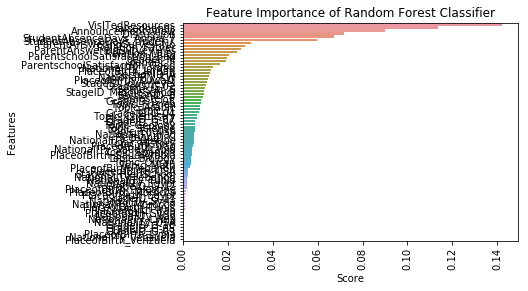

In [24]:
import seaborn as sns
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
dn = {'features':data_dummies.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()


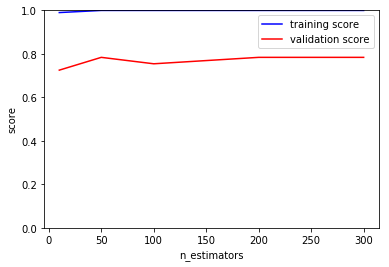

In [13]:

from sklearn.model_selection import validation_curve
degree =[10,50,100,200,300]

train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train,
                                          'n_estimators', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('score');